## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn

from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import StandardScaler

In [65]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [66]:
data = pd.read_csv('/content/gdrive/MyDrive/CCDataset/creditcard.csv')

# Data Analysis

In [67]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [68]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [69]:
print("number of frauds =", len(data[data.Class==1]), "Number of correct txn =", len(data[data.Class==0]))

number of frauds = 492 Number of correct txn = 284315


In the below plot we can we can see that the data V1 - V28 is not correlated, hence we canconclude that the PCA has already been done on the data.

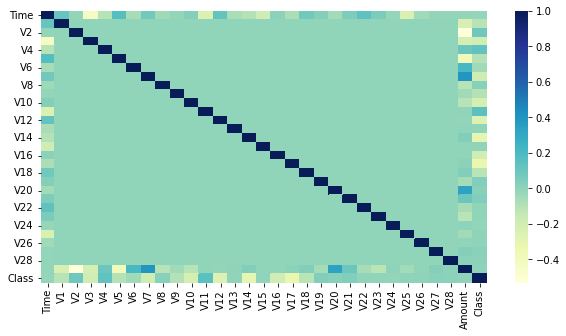

In [70]:
correlation = data.corr()
plt.figure(figsize=(10,5))
seaborn.heatmap(correlation, cmap="YlGnBu")

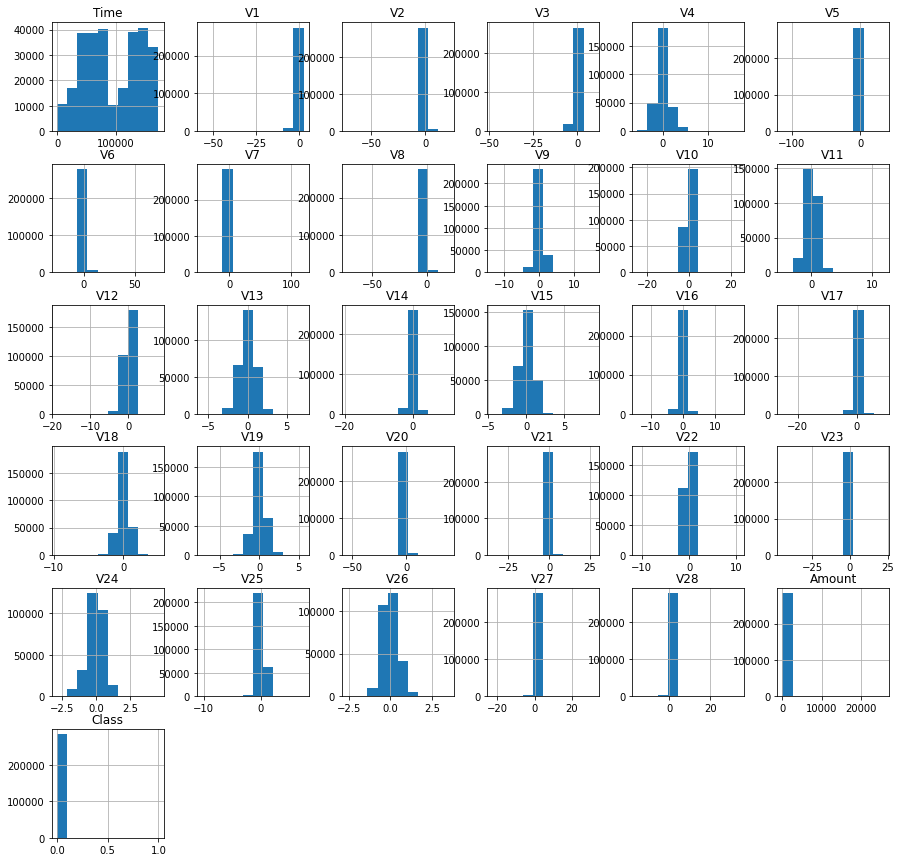

In [71]:
data.hist(figsize=(15,15))
plt.show()

In [72]:
fraud = data.loc[data['Class'] ==1].reset_index(drop=True)
regular = data.loc[data['Class'] == 0].reset_index(drop=True)

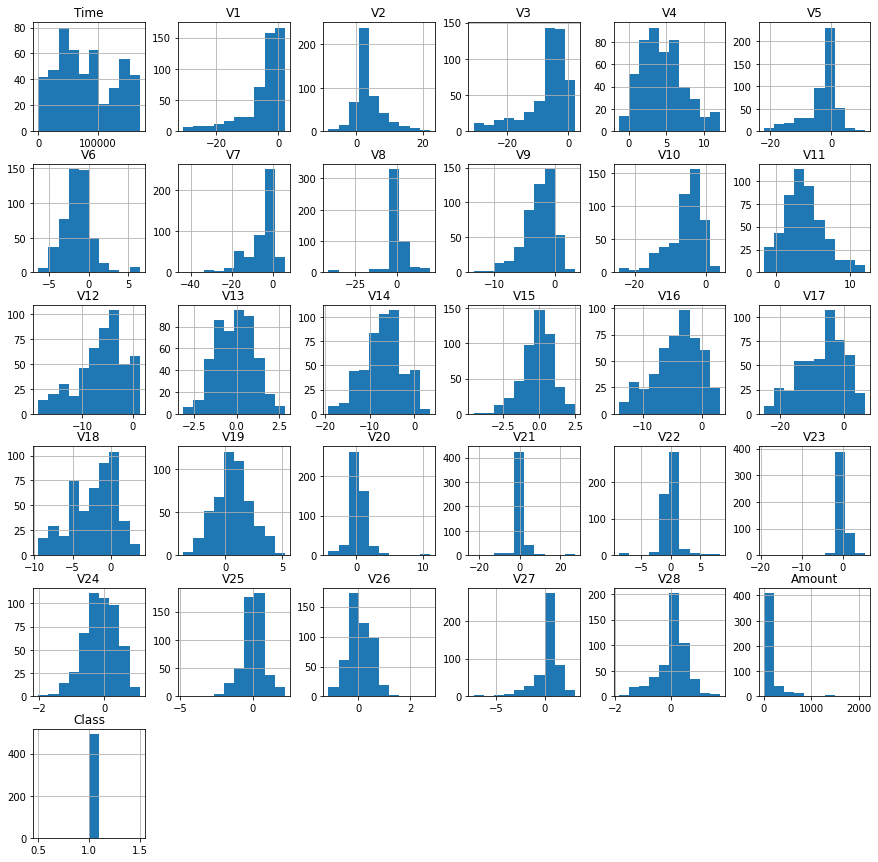

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [73]:
fraud.hist(figsize=(15,15))
plt.show()
fraud.head()

# DATA SAMPLING

In [93]:
# Reservoir Sampling
def reservoir_sampling(scale):
  i =0;
  n = len(regular.index)-1
  k = len(fraud.index)*scale

  reservoir = [0]*k
  for i in range(k):
    reservoir[i] = regular.iloc[i]

  while i < n:
    j = random.randrange(i+1)
    if j<k:
      reservoir[j] = regular.iloc[i];

    i+=1;
  print(len(reservoir))
  return pd.DataFrame(reservoir)

def shuffled_sample():
  shuffled_sample = regular.sample(frac=1).reset_index(drop=True)[:len(fraud.index)]
  return shuffled_sample

def simple_sample():
  simple_sample = regular[:len(fraud.index)]
  return simple_sample

In [94]:
def select_sample(num=3,scale=1):
  if num ==1:
    return simple_sample()
  elif num ==2:
    return shuffled_sample()
  else:
    return reservoir_sampling(scale)

In [95]:
# Sample Selection: 
# 1 : Simple sample : return first 492 elements
# 2 : Shuffled sample : shuffles the non fraud transactions and returns the top 492 elements
# default : Reservoir Sampling : Samples the non fraud transactions based on the reservoir sampling method.

res_sample = select_sample()

492


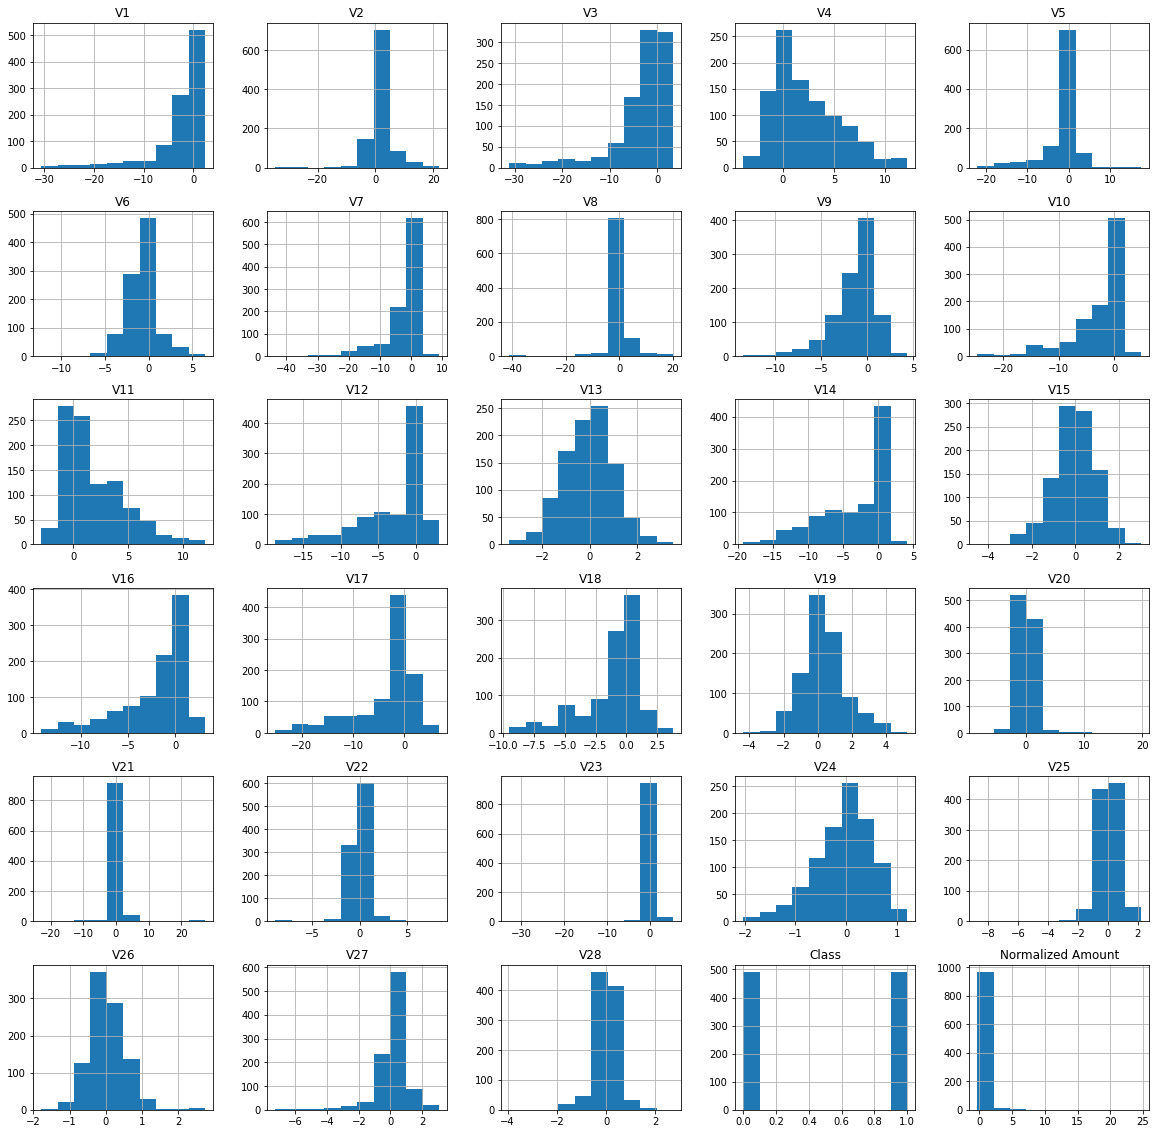

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1.0,-0.301218
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.0,1.020916
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1.0,0.298441
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1.0,-0.153759
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.0,-0.298718


In [77]:
sampled_data = fraud.append(res_sample,ignore_index=True)
sampled_data["Normalized Amount"] = StandardScaler().fit_transform(sampled_data['Amount'].values.reshape(-1, 1))
sampled_data.drop(["Time","Amount"],axis=1,inplace=True)
sampled_data.sample(frac=1).reset_index(drop=True)
sampled_data.head()

### TEST-TRAIN SPILT

In [78]:
X = sampled_data.drop('Class', axis=1)
y = sampled_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=21,shuffle = True)

# Support Vector Machine (SVM)

1) Linear SVM using Grid Cross Validation

Here we test the L1 and L2 regularizations for the linear SVM and perform hyperparameter tuning on the different SVM Kernels.

In [111]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=20)
print("Linear L1")
results = GridSearchCV(LinearSVC(), {"C":np.linspace(0.3,10,20),"loss":["squared_hinge"],"dual":[False],"penalty":["l1"]}, cv=cv, n_jobs=-1, verbose=7,scoring="roc_auc").fit(X_train, y_train)
print(results.best_score_, results.best_params_)
print("Linear L2")
results1 = GridSearchCV(LinearSVC(), {"C":np.linspace(0.3,10,20),"loss":["squared_hinge"],"dual":[True],"penalty":["l2"]}, cv=cv, n_jobs=-1, verbose=7,scoring="roc_auc").fit(X_train, y_train)
print(results1.best_score_, results1.best_params_)
print("RBF")
results2 = GridSearchCV(SVC(), {"C":np.logspace(-2,1,10),"kernel":["rbf"],"gamma":np.logspace(-10, 10, 20)}, cv=cv, n_jobs=-1, verbose=7,scoring="roc_auc").fit(X_train, y_train)
print(results2.best_score_, results2.best_params_)
print("Poly")
results3 = GridSearchCV(SVC(), {"C":np.logspace(-2,1,10),"kernel":["poly"],"degree":np.linspace(0,28,29)}, cv=cv, n_jobs=-1, verbose=7,scoring="roc_auc").fit(X_train, y_train)
print(results3.best_score_, results3.best_params_)


Linear L1
Fitting 10 folds for each of 20 candidates, totalling 200 fits
0.9751367401156431 {'C': 0.3, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}
Linear L2
Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.974917955930614 {'C': 7.44736842105263, 'dual': True, 'loss': 'squared_hinge', 'penalty': 'l2'}
RBF
Fitting 10 folds for each of 200 candidates, totalling 2000 fits
0.9788091889357711 {'C': 4.6415888336127775, 'gamma': 0.002335721469090121, 'kernel': 'rbf'}
Poly
Fitting 10 folds for each of 290 candidates, totalling 2900 fits
0.9788560712611346 {'C': 1.0, 'degree': 2.0, 'kernel': 'poly'}


SVM using different kernels with the results of hyperparameter tuning

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KERNEL :  Linear with C=1

the recall for this model is : 0.8850574712643678


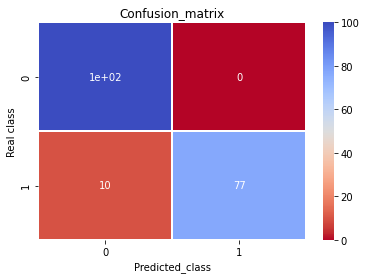

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       100
         1.0       1.00      0.89      0.94        87

    accuracy                           0.95       187
   macro avg       0.95      0.94      0.95       187
weighted avg       0.95      0.95      0.95       187



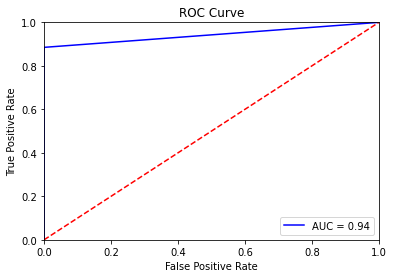


KERNEL :  Linear with L1

the recall for this model is : 0.8735632183908046


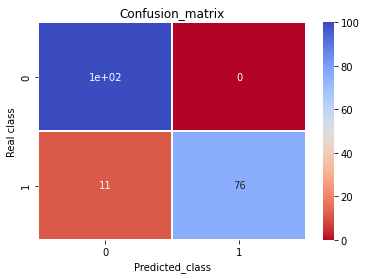

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       100
         1.0       1.00      0.87      0.93        87

    accuracy                           0.94       187
   macro avg       0.95      0.94      0.94       187
weighted avg       0.95      0.94      0.94       187



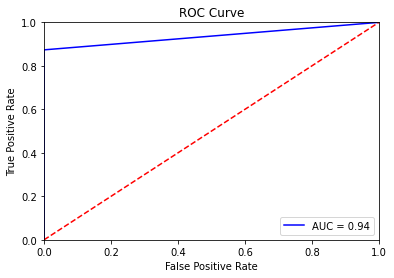


KERNEL :  Linear with L2

the recall for this model is : 0.8505747126436781


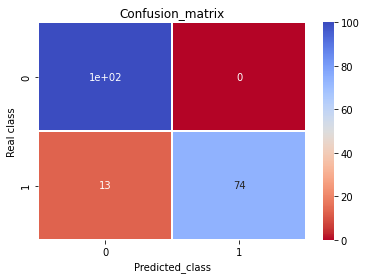

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       100
         1.0       1.00      0.85      0.92        87

    accuracy                           0.93       187
   macro avg       0.94      0.93      0.93       187
weighted avg       0.94      0.93      0.93       187



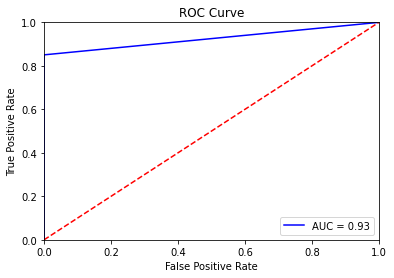


KERNEL :  Radial Bias Filter

the recall for this model is : 0.8390804597701149


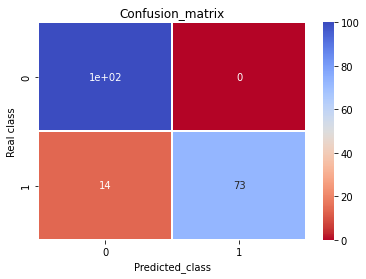

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       100
         1.0       1.00      0.84      0.91        87

    accuracy                           0.93       187
   macro avg       0.94      0.92      0.92       187
weighted avg       0.93      0.93      0.92       187



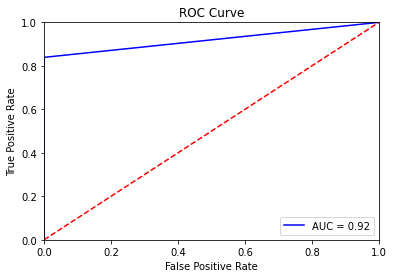


KERNEL :  Polynomial

the recall for this model is : 0.7931034482758621


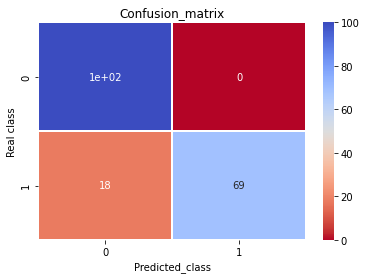

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       100
         1.0       1.00      0.79      0.88        87

    accuracy                           0.90       187
   macro avg       0.92      0.90      0.90       187
weighted avg       0.92      0.90      0.90       187



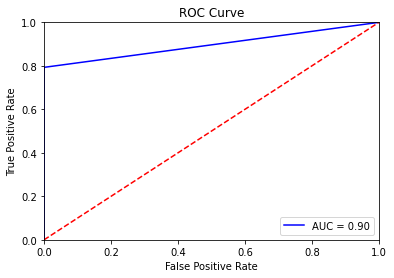

In [110]:
svc = SVC(kernel='linear', C=1).fit(X, y)
lin_svc1 = LinearSVC(C=0.3,penalty ="l1",dual=False,loss="squared_hinge").fit(X_train, y_train)
lin_svc2 = LinearSVC(C=6.93,penalty ="l2",dual=True,loss="squared_hinge").fit(X_train, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.002, C=4.64).fit(X_train, y_train)
poly_svc = SVC(kernel='poly', degree=2, C=1).fit(X_train, y_train)

kernels = ["Linear with C=1", "Linear with L1", "Linear with L2", "Radial Bias Filter", "Polynomial"]

k = [*zip(kernels,(svc, lin_svc1,lin_svc2, rbf_svc, poly_svc))]

for i, clf in k:
    
    predicted = clf.predict(X_test)
    cnf_matrix=confusion_matrix(y_test,predicted)
    prc = precision_recall_curve(y_test,predicted)
    print("KERNEL : ", i)

    print("\nthe recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    seaborn.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()

    print(classification_report(y_test,predicted))

    fpr, tpr, threshold = roc_curve(y_test,predicted)
    roc_auc = auc(fpr, tpr)

    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print()

# LOGISTIC REGRESSION

HyperParameter Tuning using GridSearchCV

In [97]:
cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=20)
print("Logistic Regression")
results_lr = GridSearchCV(LogisticRegressionCV(), {"cv":[10],"random_state":[1],"solver":["liblinear","newton-cholesky","lbfgs","sag"],"penalty":["l2"]}, cv=cv, n_jobs=-1, verbose=7).fit(X_train, y_train)
print(results_lr.best_score_, results_lr.best_params_)

Logistic Regression
Fitting 20 folds for each of 4 candidates, totalling 80 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 2031, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError(
ValueError: Logistic

0.9346874999999999 {'cv': 10, 'penalty': 'l2', 'random_state': 1, 'solver': 'liblinear'}


Creating Logistic Regression Model

In [98]:
clf = LogisticRegressionCV(cv=10, random_state=10, solver='liblinear',penalty="l2")
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)
cnf_matrix=confusion_matrix(y_test,predicted)

the recall for this model is : 0.8735632183908046


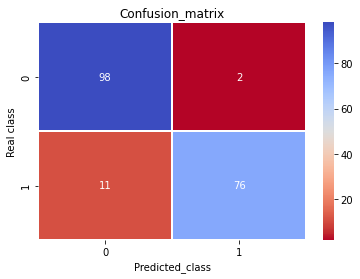

In [99]:
print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
seaborn.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

In [100]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       100
         1.0       0.97      0.87      0.92        87

    accuracy                           0.93       187
   macro avg       0.94      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187



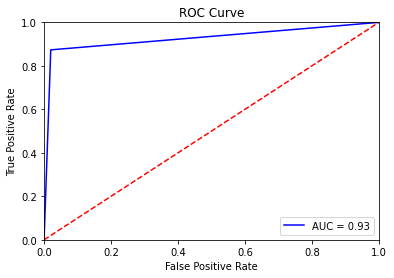

In [101]:
fpr, tpr, threshold = roc_curve(y_test,predicted)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()